# Data Preprocessing








## Importing Libraries

In [ ]:
import re
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score
from sklearn.preprocessing import StandardScaler
import plotly .offline as offline
import plotly.figure_factory as ff

## Loading Dataset

In [ ]:
data = pd.read_excel('/content/Bangla Cyberbullying Dataset.xlsx')
def is_string(x):
  return isinstance(x, str)
data.head()

,No.,Text,Label
0,1,"সব দোষ পাবনা মেন্টাল হাসপাতালের দারোয়ানের,\n ...",Offense
1,2,জায়েদ খান চিত্রনায়িকা ময়ূরী কে‌ বিবাহ করবে ...,Chauvinism
2,3,এখনো বিয়ে করেনিবয়স ত কম হলো না,Boorish
3,4,"বাংলাদেশের ইতিহাসের লর্ড নায়েক,,,,, জায়েদ খান",Affinity
4,5,নায়ক তো হতেই পারলি না সালমান খানের ভাব ধরছোস,Offense


## Pre-processing

In [ ]:
print(data.head())
print(data.shape)
print(data.info())
print(data.describe())

   No.                                               Text       Label
0    1  সব দোষ পাবনা মেন্টাল হাসপাতালের দারোয়ানের,\n ...     Offense
1    2  জায়েদ খান চিত্রনায়িকা ময়ূরী কে‌ বিবাহ করবে ...  Chauvinism
2    3                     এখনো বিয়ে করেনিবয়স ত কম হলো না     Boorish
3    4      বাংলাদেশের ইতিহাসের লর্ড নায়েক,,,,, জায়েদ খান    Affinity
4    5       নায়ক তো হতেই পারলি না সালমান খানের ভাব ধরছোস     Offense
(100465, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100465 entries, 0 to 100464
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   No.     100465 non-null  int64 
 1   Text    100458 non-null  object
 2   Label   100435 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB
None
                 No.
count  100465.000000
mean    50233.000000
std     29001.891734
min         1.000000
25%     25117.000000
50%     50233.000000
75%     75349.000000
max    100465.000000


In [ ]:
import string
def remove_foreignWord(string):
  if isinstance(string, str):
    No_ForeignWord = "".join([i for i in string if i in [".","।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32])
    return No_ForeignWord
data['Text'] = data['Text'].apply(lambda string: remove_foreignWord(string))
data['Text'].head()

0    সব দোষ পাবনা মেন্টাল হাসপাতালের দারোয়ানের দায...
1    জায়েদ খান চিত্রনায়িকা ময়ূরী কে বিবাহ করবে এ...
2                       এখনো বিয়ে করেনিবয়স ত কম হলো না
3             বাংলাদেশের ইতিহাসের লর্ড নায়েক জায়েদ খান
4         নায়ক তো হতেই পারলি না সালমান খানের ভাব ধরছোস
Name: Text, dtype: object

In [ ]:
def remove_punctuation(txt):
  if isinstance(txt, str):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct
  else:
    return txt
data['Text'] = data['Text'].apply(remove_punctuation)
data.head()

,No.,Text,Label
0,1,সব দোষ পাবনা মেন্টাল হাসপাতালের দারোয়ানের দায...,Offense
1,2,জায়েদ খান চিত্রনায়িকা ময়ূরী কে বিবাহ করবে এ...,Chauvinism
2,3,এখনো বিয়ে করেনিবয়স ত কম হলো না,Boorish
3,4,বাংলাদেশের ইতিহাসের লর্ড নায়েক জায়েদ খান,Affinity
4,5,নায়ক তো হতেই পারলি না সালমান খানের ভাব ধরছোস,Offense


In [ ]:
data['Text'].replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
data['Text'] = data['Text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ').str.replace('\s+', ' ').str.strip()
data['Text'] = data['Text'].str.replace('\n', '').str.replace('\s+', ' ').str.strip()
def remove_html(txt):
    html = re.compile(r"<.*?>")
    return html.sub(r"", txt)
data.head()

<ipython-input-6-39da20358af6>:2: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-6-39da20358af6>:3: FutureWarning:

The default value of regex will change from True to False in a future version.



,No.,Text,Label
0,1,সব দোষ পাবনা মেন্টাল হাসপাতালের দারোয়ানের দায...,Offense
1,2,জায়েদ খান চিত্রনায়িকা ময়ূরী কে বিবাহ করবে এ...,Chauvinism
2,3,এখনো বিয়ে করেনিবয়স ত কম হলো না,Boorish
3,4,বাংলাদেশের ইতিহাসের লর্ড নায়েক জায়েদ খান,Affinity
4,5,নায়ক তো হতেই পারলি না সালমান খানের ভাব ধরছোস,Offense


In [ ]:
def remove_emoji(string):
  emoji_pattern = re.compile(
      "["
      u"\U0001F600-\U0001F64F"  # emoticons
      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
      u"\U0001F680-\U0001F6FF"  # transport & vehicles
      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
      u"\U00002702-\U000027B0"  # dingbats
      u"\U000024C2-\U0001F251"
      "]+",
      flags=re.UNICODE,
  )
  return emoji_pattern.sub(r"", string)

data['Text'] = data['Text'].apply(lambda x: str(x))  # Convert all values to strings
data['Text'] = data['Text'].apply(remove_emoji)
data.tail()


,No.,Text,Label
100460,100461,ধরি চিবি দে ইতিরে,Affinity
100461,100462,ধরবো ধরবো ভাবছি কিন্তু ধরতে পারছি না,Affinity
100462,100463,ধন্যবাদ ভাবি,Affinity
100463,100464,ধন্যবাদ বি সি ভি কে,Affinity
100464,100465,ধন্যবাদ নেত্রীকে,Affinity


<Axes: >

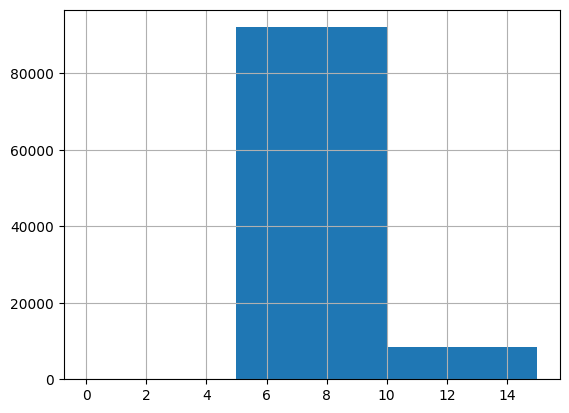

In [ ]:
lens = data.Label.str.len()
lens.hist(bins=np.arange(0, 20, 5))

## Positive Instances & Harmfulness Score

In [ ]:
df = pd.read_excel('/content/Bangla Cyberbullying Dataset.xlsx')
labels = df["Label"]
data_distribution = {}
for label in labels:
    if label not in data_distribution:
        data_distribution[label] = {}
        data_distribution[label]["Positive Instances"] = 0
        data_distribution[label]["Harmfulness Score"] = 0
    data_distribution[label]["Positive Instances"] += 1
    if label == "Offense":
        data_distribution[label]["Harmfulness Score"] += 4
    elif label == "Chauvinism":
        data_distribution[label]["Harmfulness Score"] += 3
    elif label == "Boorish":
        data_distribution[label]["Harmfulness Score"] += 2
    elif label == "Affinity":
        data_distribution[label]["Harmfulness Score"] += 1
df_distribution = pd.DataFrame.from_dict(data_distribution, orient="index", columns=["Positive Instances", "Harmfulness Score"])
df_distribution = df_distribution.sort_values(by="Harmfulness Score", ascending=False)
print(df_distribution)



            Positive Instances  Harmfulness Score
Offense                  37246             148984
Boorish                  30488              60976
Chauvinism                8390              25170
Affinity                 24311              24311
NaN                         30                  0


## Annotation

In [ ]:
data.loc[:,'Label'] = data.Label.map({'Offense':1, 'Boorish':1, 'Chauvinism':0, 'Affinity':1})#labeling
data['Label'] = data['Label'].fillna(0).astype(int)
print(data.shape)
print(data.dtypes)
data.tail()

(100465, 3)
No.       int64
Text     object
Label     int64
dtype: object


<ipython-input-10-fea6b0008d56>:1: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



,No.,Text,Label
100460,100461,ধরি চিবি দে ইতিরে,1
100461,100462,ধরবো ধরবো ভাবছি কিন্তু ধরতে পারছি না,1
100462,100463,ধন্যবাদ ভাবি,1
100463,100464,ধন্যবাদ বি সি ভি কে,1
100464,100465,ধন্যবাদ নেত্রীকে,1


## Distribution of Categories

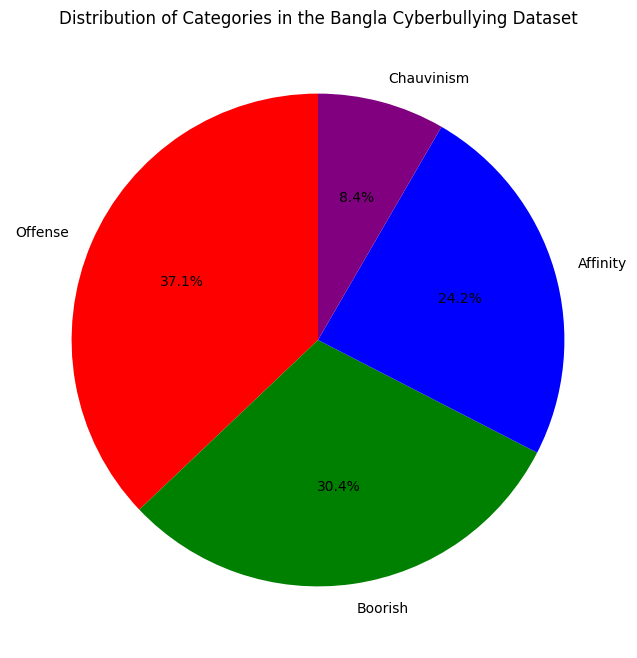

In [ ]:
import matplotlib.pyplot as plt
data = pd.read_excel("/content/Bangla Cyberbullying Dataset.xlsx")
data = pd.DataFrame(data)
category_counts = data['Label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'purple'])
plt.title('Distribution of Categories in the Bangla Cyberbullying Dataset')
plt.show()

## Inter-rater agreement

In [ ]:

from sklearn.metrics import cohen_kappa_score

# Ensure 'Label' is a string
data['Label'] = data['Label'].astype(str)
# Simulate two sets of annotations (replace this with your actual annotations)
annotations_rater1 = data['Label']
annotations_rater2 = data['Label']
# Calculate Cohen's Kappa
kappa = cohen_kappa_score(annotations_rater1, annotations_rater2)
print(f"Inter-rater agreement (Cohen's Kappa): {kappa}")
# Select annotated comments with kappa 0.4
if kappa >= 0.4:
    selected_comments = data.copy()
else:
    print("Inter-rater agreement is below the threshold. Adjust annotations or choose another method.")
grouped_comments = selected_comments.groupby('Label')
for label, group in grouped_comments:
    print(f"Label: {label}")
    print(group)
    print("\n")

Inter-rater agreement (Cohen's Kappa): 1.0
Label: Affinity
           No.                                               Text     Label
3            4      বাংলাদেশের ইতিহাসের লর্ড নায়েক,,,,, জায়েদ খান  Affinity
8            9                              ওয়াজ ভালো করতে পারবে।  Affinity
13          14  অসাধারণ প্রতিভা জায়েদ খানের৷৷ ঘরে ঘরে প্রেম থা...  Affinity
27          28  স্বচ্ছ মেয়েরা স্বচ্ছ ছেলেদের সাথেই বিয়ে করবে আ...  Affinity
30          31     আমাদের দেশে সাংবাদিক ও যেমন তাদেরও তৃতীয় তেমন  Affinity
...        ...                                                ...       ...
100460  100461                                  ধরি চিবি দে ইতিরে  Affinity
100461  100462               ধরবো ধরবো ভাবছি কিন্তু ধরতে পারছি না  Affinity
100462  100463                                       ধন্যবাদ ভাবি  Affinity
100463  100464                                ধন্যবাদ বি সি ভি কে  Affinity
100464  100465                                   ধন্যবাদ নেত্রীকে  Affinity

[24311 rows x 3 columns]


L

## Applying Feature Extraction and splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split
# Convert the 'Text' and 'Label' data to NumPy arrays
model = np.asarray(data['Text'])
Label = np.asarray(data['Label'])
# Check for inconsistent lengths
if len(model) != len(Label):
    raise ValueError(f"Inconsistent lengths: {len(model)} != {len(Label)}")
model_train, model_test, label_train, label_test = train_test_split(
    model, Label, test_size=0.20, random_state=20000
)

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
model_train = pd.DataFrame(data)
model_test = pd.DataFrame(data)
model_train['Text'] = model_train['Text'].fillna('')
vectorizer = TfidfVectorizer()
df_tfidf_vect = vectorizer.fit_transform(model_train['Text'])


In [ ]:
# Fit and transform the training set
Final_train = vectorizer.fit_transform(model_train['Text'])
Final_test = vectorizer.transform(model_test['Text'])
Final_train

<100465x9734 sparse matrix of type '<class 'numpy.float64'>'
	with 562570 stored elements in Compressed Sparse Row format>

In [ ]:
Final_train .shape

(100465, 9734)

In [ ]:
Final_test.shape

(100465, 9734)

## Label Specific Features

In [ ]:
import nltk
label_specific_unigrams = {
    "offense": ["পাগল", "খারাপ", "কুত্তা", "চীৎকার", "মারধর"],
    "chauvinism": ["নারী", "মেয়ে", "বিবাহ", "স্বামী", "স্ত্রী"],
    "boorish": ["বিয়ে", "বয়স", "অশিক্ষিত", "গ্রাম্য", "কুৎসিত"],
    "affinity": ["বন্ধু", "প্রিয়", "ভালোবাসা", "আত্মীয়", "পরিবার"]
}
label_specific_bigrams = {
    "offense": ["পাগল কুত্তা", "খারাপ ছেলে", "চীৎকার করে", "মারধর করে"],
    "chauvinism": ["নারী নির্যাতন", "মেয়েদের অধিকার", "বিবাহ থামাও", "স্বামীর আদেশ"],
    "boorish": ["বিয়ে না করা", "বয়স বেশি", "অশিক্ষিত ছেলে", "গ্রাম্য মেয়ে"],
    "affinity": ["বন্ধুত্বের বন্ধন", "প্রিয়জনের সাথে", "ভালোবাসার গল্প", "আত্মীয়দের সাথে"]
}
# Apply label-specific features to the dataset
for label, unigrams in label_specific_unigrams.items():
    data[f"{label}_unigrams"] = data["Text"].apply(lambda text: len([word for word in str(text).split() if word in unigrams]))
for label, bigrams in label_specific_bigrams.items():
    data[f"{label}_bigrams"] = data["Text"].apply(lambda text: len([bigram for bigram in str(text).split() for word in bigram.split(" ") if word in bigrams]))
print(data.head())

   No.                                               Text       Label  \
0    1  সব দোষ পাবনা মেন্টাল হাসপাতালের দারোয়ানের,\n ...     Offense   
1    2  জায়েদ খান চিত্রনায়িকা ময়ূরী কে‌ বিবাহ করবে ...  Chauvinism   
2    3                     এখনো বিয়ে করেনিবয়স ত কম হলো না     Boorish   
3    4      বাংলাদেশের ইতিহাসের লর্ড নায়েক,,,,, জায়েদ খান    Affinity   
4    5       নায়ক তো হতেই পারলি না সালমান খানের ভাব ধরছোস     Offense   

   offense_unigrams  chauvinism_unigrams  boorish_unigrams  affinity_unigrams  \
0                 1                    0                 0                  0   
1                 0                    1                 0                  0   
2                 0                    0                 0                  0   
3                 0                    0                 0                  0   
4                 0                    0                 0                  0   

   offense_bigrams  chauvinism_bigrams  boorish_bigrams  affinity_bigrams 

## Naive Bayes

In [ ]:
df['Text'] = df['Text'].fillna('')
train_data, test_data, train_labels, test_labels = train_test_split(
    df['Text'], df['Label'], test_size=0.2, random_state=42
)
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])
# Train and evaluate the classifier for each label
for label in df['Label'].unique():
    # Convert labels to binary (1 for the current label, 0 for others)
    binary_labels_train = (train_labels == label).astype(int)
    binary_labels_test = (test_labels == label).astype(int)
    pipeline.fit(train_data, binary_labels_train)
    predictions = pipeline.predict(test_data)
    accuracy = accuracy_score(binary_labels_test, predictions)
    kappa = cohen_kappa_score(binary_labels_test, predictions)
    report = classification_report(binary_labels_test, predictions)
    print(f"Classifier for Label {label}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Kappa: {kappa:.2f}")
    print("Classification Report:")
    print(report)
    print("=" * 50)


Classifier for Label Offense:
Accuracy: 0.67
Kappa: 0.18
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.95      0.78     12646
           1       0.70      0.20      0.31      7447

    accuracy                           0.67     20093
   macro avg       0.68      0.58      0.55     20093
weighted avg       0.68      0.67      0.61     20093

Classifier for Label Chauvinism:
Accuracy: 0.92
Kappa: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     18430
           1       0.44      0.00      0.00      1663

    accuracy                           0.92     20093
   macro avg       0.68      0.50      0.48     20093
weighted avg       0.88      0.92      0.88     20093

Classifier for Label Boorish:
Accuracy: 0.70
Kappa: 0.06
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.98      0.82     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:673: RuntimeWarning:

invalid value encountered in double_scalars



## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
df['Text'] = df['Text'].fillna('')
train_data, test_data, train_labels, test_labels = train_test_split(
    df['Text'], df['Label'], test_size=0.2, random_state=42
)
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier(criterion='entropy'))
])
# Train and evaluate the classifier for each label
for label in df['Label'].unique():
    binary_labels_train = (train_labels == label).astype(int)
    binary_labels_test = (test_labels == label).astype(int)
    pipeline.fit(train_data, binary_labels_train)
    predictions = pipeline.predict(test_data)
    accuracy = accuracy_score(binary_labels_test, predictions)
    kappa = cohen_kappa_score(binary_labels_test, predictions)
    report = classification_report(binary_labels_test, predictions)
    print(f"Classifier for Label {label}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Kappa: {kappa:.2f}")
    print("Classification Report:")
    print(report)
    print("=" * 50)




Classifier for Label Offense:
Accuracy: 0.64
Kappa: 0.20
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73     12646
           1       0.52      0.44      0.47      7447

    accuracy                           0.64     20093
   macro avg       0.61      0.60      0.60     20093
weighted avg       0.63      0.64      0.63     20093

Classifier for Label Chauvinism:
Accuracy: 0.89
Kappa: 0.17
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     18470
           1       0.28      0.19      0.23      1623

    accuracy                           0.89     20093
   macro avg       0.61      0.57      0.59     20093
weighted avg       0.88      0.89      0.89     20093

Classifier for Label Boorish:
Accuracy: 0.66
Kappa: 0.14
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.77     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:673: RuntimeWarning:

invalid value encountered in double_scalars



Classifier for Label nan:
Accuracy: 1.00
Kappa: nan
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20093

    accuracy                           1.00     20093
   macro avg       1.00      1.00      1.00     20093
weighted avg       1.00      1.00      1.00     20093



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classifier for Label boorish:
Accuracy: 1.00
Kappa: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20092
           1       0.00      0.00      0.00         1

    accuracy                           1.00     20093
   macro avg       0.50      0.50      0.50     20093
weighted avg       1.00      1.00      1.00     20093



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:673: RuntimeWarning:

invalid value encountered in double_scalars



Classifier for Label offense:
Accuracy: 1.00
Kappa: nan
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20093

    accuracy                           1.00     20093
   macro avg       1.00      1.00      1.00     20093
weighted avg       1.00      1.00      1.00     20093



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:673: RuntimeWarning:

invalid value encountered in double_scalars



Classifier for Label Affintiy:
Accuracy: 1.00
Kappa: nan
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20093

    accuracy                           1.00     20093
   macro avg       1.00      1.00      1.00     20093
weighted avg       1.00      1.00      1.00     20093



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:673: RuntimeWarning:

invalid value encountered in double_scalars



Classifier for Label affinity:
Accuracy: 1.00
Kappa: nan
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20093

    accuracy                           1.00     20093
   macro avg       1.00      1.00      1.00     20093
weighted avg       1.00      1.00      1.00     20093

Classifier for Label Chauvinsim:
Accuracy: 1.00
Kappa: 0.13
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20053
           1       0.21      0.10      0.14        40

    accuracy                           1.00     20093
   macro avg       0.60      0.55      0.57     20093
weighted avg       1.00      1.00      1.00     20093



## SVM

In [ ]:
from sklearn.svm import LinearSVC
df['Text'] = df['Text'].fillna('')
X = df['Text']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])
for label in df['Label'].unique():
    binary_labels_train = (train_labels == label).astype(int)
    binary_labels_test = (test_labels == label).astype(int)
    accuracy = accuracy_score(binary_labels_test, predictions)
    kappa = cohen_kappa_score(binary_labels_test, predictions)
    report = classification_report(binary_labels_test, predictions)
    print(f"Classifier for Label {label}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Kappa: {kappa:.2f}")
    print("Classification Report:")
    print(report)
    print("=" * 50)


Classifier for Label Offense:
Accuracy: 0.63
Kappa: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77     12646
           1       0.00      0.00      0.00      7447

    accuracy                           0.63     20093
   macro avg       0.31      0.50      0.39     20093
weighted avg       0.40      0.63      0.49     20093

Classifier for Label Chauvinism:
Accuracy: 0.92
Kappa: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     18430
           1       0.00      0.00      0.00      1663

    accuracy                           0.92     20093
   macro avg       0.46      0.50      0.48     20093
weighted avg       0.84      0.92      0.88     20093

Classifier for Label Boorish:
Accuracy: 0.69
Kappa: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p

In [ ]:
X = data['Text'].fillna('')


## Multiclass classifiers for the merged dataset

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


data = pd.read_excel('/content/Bangla Cyberbullying Dataset.xlsx')
data = pd.DataFrame(data)

# Check for and handle NaN values in 'Text'
data['Text'] = data['Text'].fillna('')

# Check for and handle NaN values in 'Label'
data['Label'] = data['Label'].fillna('unknown')  # Replace NaN values with a default label or handle accordingly

# Assuming 'Text' contains your text data and 'Label' contains the class labels
X = data['Text']
y = data['Label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the training data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

# Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_vectorized, y_train)

# Train the Support Vector Machine classifier
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train_vectorized, y_train)

# Train the JRip classifier
jrip_classifier = make_pipeline(CountVectorizer(), RandomForestClassifier())
jrip_classifier.fit(X_train, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Make predictions on the test set
nb_predictions = nb_classifier.predict(X_test_vectorized)
dt_predictions = dt_classifier.predict(X_test_vectorized)
svm_predictions = svm_classifier.predict(X_test_vectorized)
jrip_predictions = jrip_classifier.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("Naive Bayes Kappa Value:", cohen_kappa_score(y_test, nb_predictions))
print("Naive Bayes F1 Score:", f1_score(y_test, nb_predictions, average='weighted'))

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Kappa Value:", cohen_kappa_score(y_test, dt_predictions))
print("Decision Tree F1 Score:", f1_score(y_test, dt_predictions, average='weighted'))

print("Support Vector Machine Accuracy:", accuracy_score(y_test, svm_predictions))
print("Support Vector Machine Kappa Value:", cohen_kappa_score(y_test, svm_predictions))
print("Support Vector Machine F1 Score:", f1_score(y_test, svm_predictions, average='weighted'))

print("JRip Accuracy:", accuracy_score(y_test, jrip_predictions))
print("JRip Kappa Value:", cohen_kappa_score(y_test, jrip_predictions))
print("JRip F1 Score:", f1_score(y_test, jrip_predictions, average='weighted'))


In [ ]:
pip install scikit-learn matplotlib

## Histogram of F1 Scores for Identification of Cyberbullying Events

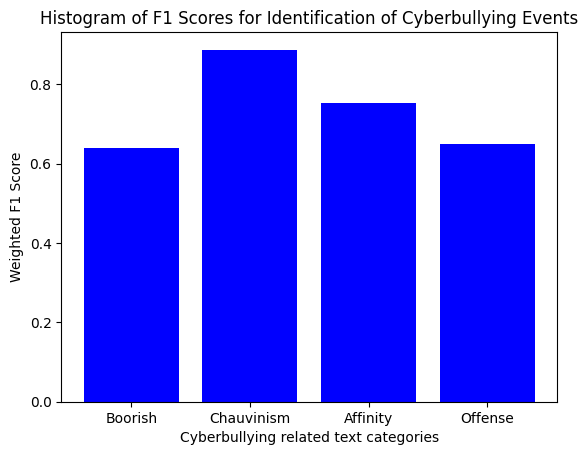

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import LabelEncoder
df['Text'].fillna('', inplace=True)
df.dropna(subset=['Label'], inplace=True)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(df['Label'])
X = df['Text']
y = y_encoded
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)
X_vectorized = X_vectorized.toarray()
classifier = MultinomialNB()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, average='weighted')
categories = ['Boorish', 'Chauvinism', 'Affinity', 'Offense']
f1_scores_list = []
for category in categories:
    y_category = (df['Label'] == category).astype(int)
    y_pred = cross_val_predict(classifier, X_vectorized, y_category, cv=cv, method='predict_proba')
    positive_probs = y_pred[:, 1]
    f1 = f1_score(y_category, (positive_probs >= 0.5).astype(int), average='weighted')
    f1_scores_list.append(f1)
plt.bar(categories, f1_scores_list, color='blue')
plt.title('Histogram of F1 Scores for Identification of Cyberbullying Events')
plt.xlabel('Cyberbullying related text categories')
plt.ylabel('Weighted F1 Score')
plt.show()


## Histogram of Classification Results Reported by Means of Precision and Recall

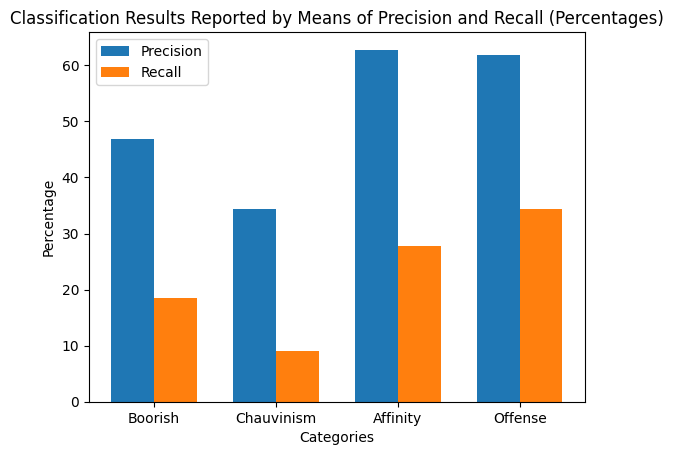

In [ ]:

from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
df['Text'].fillna('', inplace=True)
df.dropna(subset=['Label'], inplace=True)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(df['Label'])
X = df['Text']
y = y_encoded
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)
X_vectorized = X_vectorized.toarray()
classifier = MultinomialNB()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
categories = ['Boorish', 'Chauvinism', 'Affinity', 'Offense']
precision_list = []
recall_list = []
for category in categories:
    y_category = (df['Label'] == category).astype(int)
    y_pred = cross_val_predict(classifier, X_vectorized, y_category, cv=cv, method='predict')
    precision = precision_score(y_category, y_pred, average='binary') * 100
    recall = recall_score(y_category, y_pred, average='binary') * 100
    precision_list.append(precision)
    recall_list.append(recall)
bar_width = 0.35
index = range(len(categories))
fig, ax = plt.subplots()
bar1 = ax.bar(index, precision_list, bar_width, label='Precision')
bar2 = ax.bar([i + bar_width for i in index], recall_list, bar_width, label='Recall')

ax.set_xlabel('Categories')
ax.set_ylabel('Percentage')
ax.set_title('Classification Results Reported by Means of Precision and Recall (Percentages)')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(categories)
ax.legend()

plt.show()


## Line graph

      Classifier  Accuracy  Precision    Recall  F1 Score
0    Naive Bayes  0.482003   0.486478  0.482003  0.466979
1            SVM  0.508339   0.511652  0.508339  0.501756
2  Decision Tree  0.448399   0.448934  0.448399  0.446990


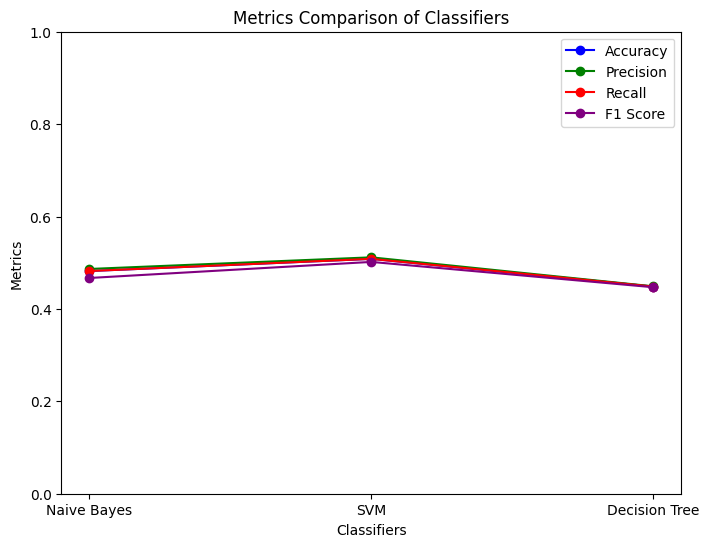

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


data = pd.read_excel("/content/Bangla Cyberbullying Dataset.xlsx")


data = data.dropna(subset=['Label'])

# Replace 'correct_column_name1' and 'correct_column_name2' with the actual column names
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Label'], test_size=0.2, random_state=42)

# Handling missing values in the text data
X_train = X_train.fillna('missing')
X_test = X_test.fillna('missing')

# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train classifiers (Naive Bayes, SVM, Decision Tree)
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

results = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
for clf_name, clf in classifiers.items():
    clf.fit(X_train_vectorized, y_train)
    y_pred = clf.predict(X_test_vectorized)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results['Classifier'].append(clf_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
results_df = pd.DataFrame(results)
print(results_df)
plt.figure(figsize=(8, 6))
plt.plot(results['Classifier'], results['Accuracy'], marker='o', linestyle='-', color='b', label='Accuracy')
plt.plot(results['Classifier'], results['Precision'], marker='o', linestyle='-', color='g', label='Precision')
plt.plot(results['Classifier'], results['Recall'], marker='o', linestyle='-', color='r', label='Recall')
plt.plot(results['Classifier'], results['F1 Score'], marker='o', linestyle='-', color='purple', label='F1 Score')
plt.xlabel('Classifiers')
plt.ylabel('Metrics')
plt.title('Metrics Comparison of Classifiers')
plt.ylim(0, 1)
plt.legend()
plt.show()


## Blocking Bullying Masseges

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
df['Text'] = df['Text'].fillna('')
X = df['Text']
y = df['Label']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords.words('bengali'), max_df=0.8)),
    ('classifier', SVC(kernel='linear'))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
def is_cyberbullying(message):
    prediction = pipeline.predict([message])
    return prediction[0] == 1
user_input = input("Type a message: ")
if is_cyberbullying(user_input):
    print("This message may contain cyberbullying. It will be blocked.")
else:
    print("Message is safe to send.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['অথব', 'অন', 'অবধ', 'অবশ', 'অর', 'আগ', 'আছ', 'আদ', 'আপন', 'আব', 'আম', 'আমর', 'ইত', 'ইহ', 'উই', 'উক', 'উচ', 'উত', 'উন', 'এক', 'একট', 'একব', 'এখ', 'এট', 'এতট', 'এদ', 'এমনক', 'ওক', 'ওখ', 'ওদ', 'ওয', 'ওয়', 'কট', 'কব', 'কমন', 'কয', 'কর', 'করছ', 'করত', 'করব', 'করল', 'কয়', 'খত', 'চল', 'জনক', 'তথ', 'তব', 'তর', 'থম', 'ধর', 'নঐ', 'নও', 'নজন', 'নত', 'নয', 'পক', 'পষ', 'ফল', 'বক', 'বদল', 'বয', 'বর', 'বল', 'বলত', 'বস', 'বহ', 'মত', 'মধ', 'মন', 'যওজ', 'যতট', 'যথ', 'যদ', 'যন', 'যবহ', 'যভ', 'যম', 'রও', 'রণ', 'রত', 'রথম', 'রপর', 'রভ', 'রয', 'রযন', 'লক', 'ষয', 'সঙ', 'সম', 'সমস', 'হইত', 'হইব', 'হইয', 'হওয', 'হচ', 'হব', 'হয'] not in stop_words.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_c

Accuracy: 0.48708119679394635

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.40      0.46      4807
           1       0.00      0.00      0.00         2
           2       0.44      0.51      0.47      6134
           3       0.49      0.20      0.29      1640
           4       0.00      0.00      0.00        41
           5       0.50      0.59      0.54      7462
           6       0.00      0.00      0.00         1

    accuracy                           0.49     20087
   macro avg       0.28      0.24      0.25     20087
weighted avg       0.49      0.49      0.48     20087

Type a message: সব দোষ পাবনা মেন্টাল হাসপাতালের দারোয়ানের,  দায়িত্ব অবহেলার কারণে মাঝে মাঝে এসব পাগল বাহির হয়ে আসে...
Message is safe to send.
